# Проект: Анализ продукта для интернет магазина компьютерных игр 

#  1. Откроем файл с данными и изучим общую информацию

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import timedelta
import seaborn as sns

In [2]:
#импорт данных
data_games = pd.read_csv('/datasets/games.csv')

In [3]:
#обзор данных

data_games.tail(10)
data_games.sample(10)
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посчитаем пропуски
data_games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# обзор значений
data_games.Rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

**Поищем причину и закономености пропусков данных**

In [7]:
#стелаем срез по строкам с пропусками в рейтинге
rating_nulldata = data_games.query('Rating.isnull()')
rating_nulldata.Year_of_Release.value_counts()
rating_nulldata.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10561,Monkey Island: Special Edition Collection,PS3,2011.0,Adventure,0.00,0.08,0.00,0.02,NaN,NaN,NaN
14348,Gotouchi Kenkei DS,DS,2006.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
9276,Shinobido 2: Tales of the Ninja,PSV,2011.0,Action,0.04,0.05,0.02,0.02,NaN,NaN,NaN
16332,Hi Hi Puffy AmiYumi: The Genie & the Amp,DS,2006.0,Action,0.01,0.00,0.00,0.00,NaN,NaN,NaN
15793,Clover no Kuni no Alice: Wonderful Wonder World,PSP,2011.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
618,Mario Party 2,N64,1999.0,Misc,1.28,0.14,1.08,0.01,NaN,NaN,NaN
600,Super Mario All-Stars: Limited Edition,Wii,2010.0,Platform,0.99,0.52,0.92,0.14,NaN,NaN,NaN
15610,Kamen Rider: Battride War II,WiiU,2014.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
13610,Naruto Shippuden: Dairansen! Kage Bunshin Emaki,DS,2008.0,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2349,Seiken Densetsu 3,SNES,1995.0,Role-Playing,0.00,0.00,0.89,0.00,NaN,NaN,NaN


In [8]:
# и сравним со значениями без пропусков
data_ratingnotnull = data_games.query('-Rating.isnull()')
data_ratingnotnull.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,4.99,3.64,0.38,1.60,94.0,6.3,M
570,Guitar Hero: World Tour,X360,2008.0,Misc,1.78,0.63,0.00,0.25,85.0,6.3,T
12633,Worms 3D,XB,2003.0,Strategy,0.04,0.01,0.00,0.00,69.0,8.4,T
14446,Garfield: A Tale of Two Kitties,DS,2006.0,Platform,0.03,0.00,0.00,0.00,59.0,tbd,E
1056,No Man's Sky,PS4,2016.0,Action,0.63,0.76,0.03,0.27,71.0,4.5,T
5994,The Chronicles of Riddick: Assault on Dark Athena,X360,2009.0,Shooter,0.16,0.10,0.00,0.03,82.0,8.2,M
9972,My Chinese Coach,DS,2008.0,Misc,0.10,0.01,0.00,0.01,NaN,tbd,E
5749,LEGO Legends of Chima: Laval's Journey,3DS,2013.0,Adventure,0.18,0.10,0.00,0.03,65.0,3.6,E10+
16599,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,0.00,0.01,0.00,0.00,NaN,tbd,E
11460,Outlaw Golf,GC,2002.0,Sports,0.06,0.02,0.00,0.00,69.0,tbd,T


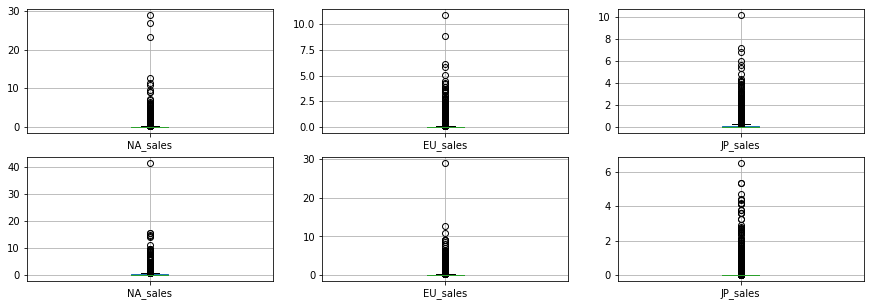

In [9]:
# посмотрим разброс значений цен с пропусками в рейтинге
plt.subplots(figsize = (15,5))
rating_nulldata.boxplot('NA_sales',  ax = plt.subplot(2,3,1))
rating_nulldata.boxplot('EU_sales',  ax = plt.subplot(2,3,2))
rating_nulldata.boxplot('JP_sales', ax = plt.subplot(2,3,3))
data_ratingnotnull.boxplot('NA_sales',  ax = plt.subplot(2,3,4))
data_ratingnotnull.boxplot('EU_sales',  ax = plt.subplot(2,3,5))
plot = data_ratingnotnull.boxplot('JP_sales',  ax = plt.subplot(2,3,6))

### Вывод  
Есть пропуски значениях Name, Year_of_Release, Critic_Score, User_Score, Rating; присутствуют устаревшие название в рейтинге (k-e)  
Закономерности в пропуске знчений не выявлено, за исключением гипотезы о том что за 2015-16 гг пропуск рейтинга может значить RP

Заменять пропуски в данных рейтингв не имеет смысла, так это может повлиять на результаты. 

# 2. Подготовка данных  
Замените названия столбцов (приведите к нижнему регистру);  
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; 
Обработайте пропуски при необходимости:  
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; 
Опишите причины, которые могли привести к пропускам;  
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;  
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  

In [10]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
# переведем заголовки к нижнему регистру
data_games.columns = data_games.columns.str.lower()
#data_games

In [12]:
#удалим пропуски в годе релиза и переведем год в datetime
data_games = data_games[~data_games['year_of_release'].isna()]
data_games['year_of_release'] = data_games['year_of_release'].astype(int)




In [13]:
# посмотрим на пропуски в имени
data_games.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [14]:
#удалим строки с пропускми в имени
data_games = data_games.query('~(name != name)')

In [15]:
#data_games.info()

In [16]:
# найдем значения tbd
data_games.critic_score.unique()
data_games.rating.unique()
data_games.user_score.unique()
data_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [17]:
#заменим это значение на NaN
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = float('nan')
# переведем user_score в формат float
data_games.user_score = data_games.user_score.astype(float)
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [18]:
#посчитаем суммарные продажи во всех регионах
data_games['sum_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Вывод
   Мы удалили пропуски в стобце Name и  year_of_release, тк их незначительное количество и целесообразнее их удалить. Пропуски данных могли возникнть в связи с техническими ошибками при заполнении. Также мы были вынуждены удалить пропуски в year_of_release для того, чтобы перевести дату в целочисленный формат.   
   Также остались пропуски в critic_score, user_score,rating - заполнять их небудем, тк при дальнейшем анализе это может исказить результаты. Причины пропусков можно назвать как "не было отзывов" и "рейтинг не составлялся".  
   Что касается tbd, заменим это значение на NaN, чтобы потом со стат-тестами и корреляцией можно было корректно работать.

# 3. Проведите исследовательский анализ данных
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.  
Не учитывайте в работе данные за предыдущие годы.  
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.  
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
Соотнесите выводы с продажами игр на других платформах.  
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?  

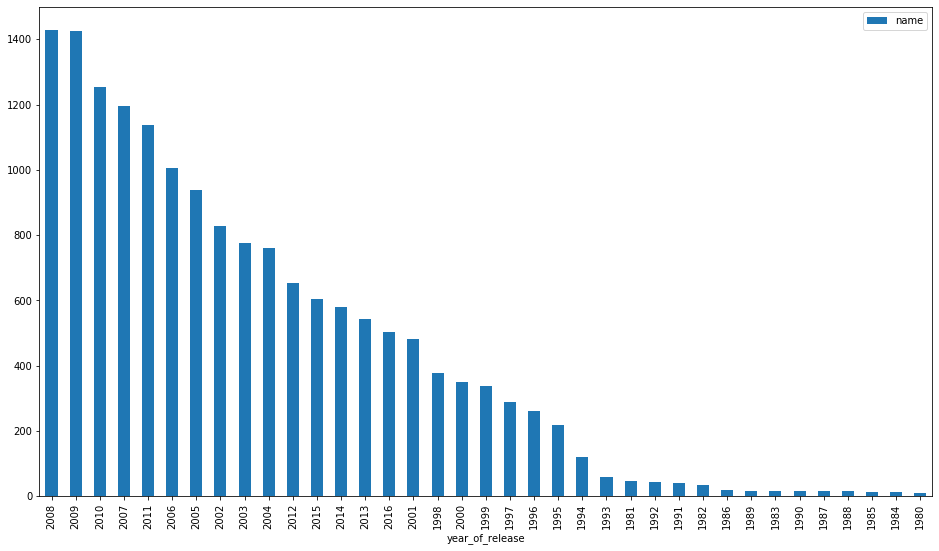

In [19]:
# Посмотрим, сколько игр выпускалось в разные годы
(
data_games
    .pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
    .sort_values(by = 'name', ascending = False)
    .plot(kind = 'bar',figsize = (16,9))
)
plt.show()

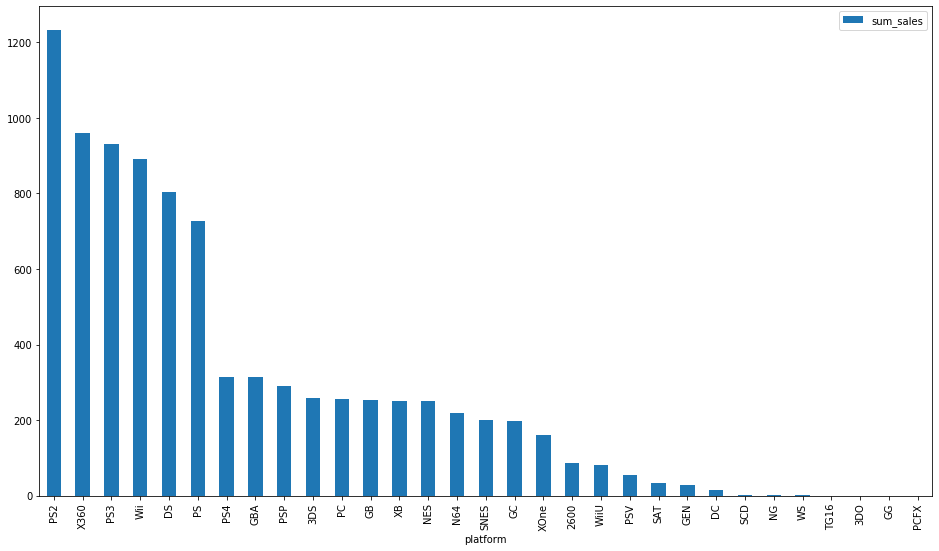

In [20]:
# Выберите платформы с наибольшими суммарными продажами
(
data_games
    .pivot_table(index = 'platform', values = 'sum_sales', aggfunc = 'sum')
    .sort_values(by='sum_sales', ascending = False).head(40)
    .plot(kind = 'bar',figsize = (16,9))
)
plt.show()


Можно предположить, что наибольшую важность представляют данные за последние годы.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

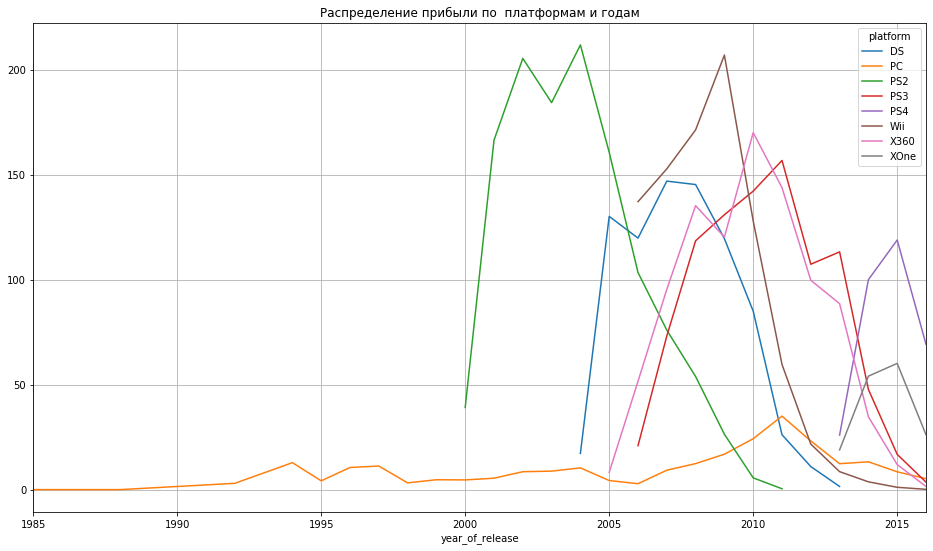

In [21]:
# соберем словарь популярных платформ
top_platforms = ['PS2','X360','PS3','Wii', 'DS', 'PC','PS4','XOne']
#сделаем шрафик распределения
pd.pivot_table(data_games.query('platform.isin(@top_platforms)'),
              index = 'year_of_release',
              columns = 'platform',
              values = 'sum_sales',
              aggfunc = 'sum').plot(grid = True, figsize = (16,9), title = 'Распределение прибыли по  платформам и годам')

plt.show()

**В результате распределения мы видим следующие результаты:**  
 - Средний срок активной жизни платформ 10 лет.
 - Самыми прибыльными были PS2 и Wii, затем рядом идут X360,PS3, DS
 - игры на PC имеют место быть за все время данных, поэтому и попали в суммарный топ
 - 2008-2012 очень выгодное время для компьютерных игр
 - Пик продаж одной платфоры приходится на 0 уровень другой: PS2 - Wii, wii - PS4, PS3-PS4, DS-PS3

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

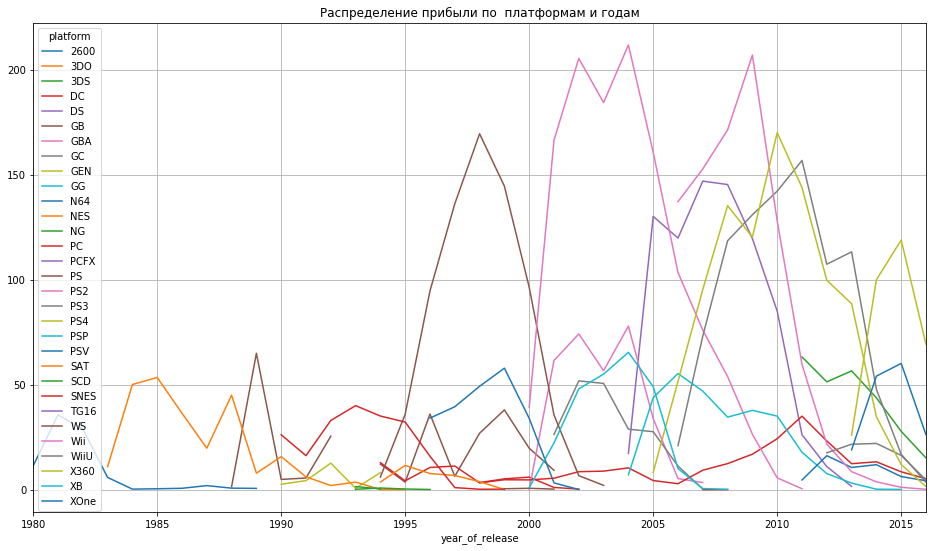

In [22]:
#сделаем обзор ситуации по всем платформам
pd.pivot_table(data_games,
              index = 'year_of_release',
              columns = 'platform',
              values = 'sum_sales',
              aggfunc = 'sum').plot(grid = True, figsize = (16,9), title = 'Распределение прибыли по  платформам и годам')

plt.show()

Судя по графику, актуальный период можнго считать 2013-2015 гг, по 2016 году, возможно, данные не полные


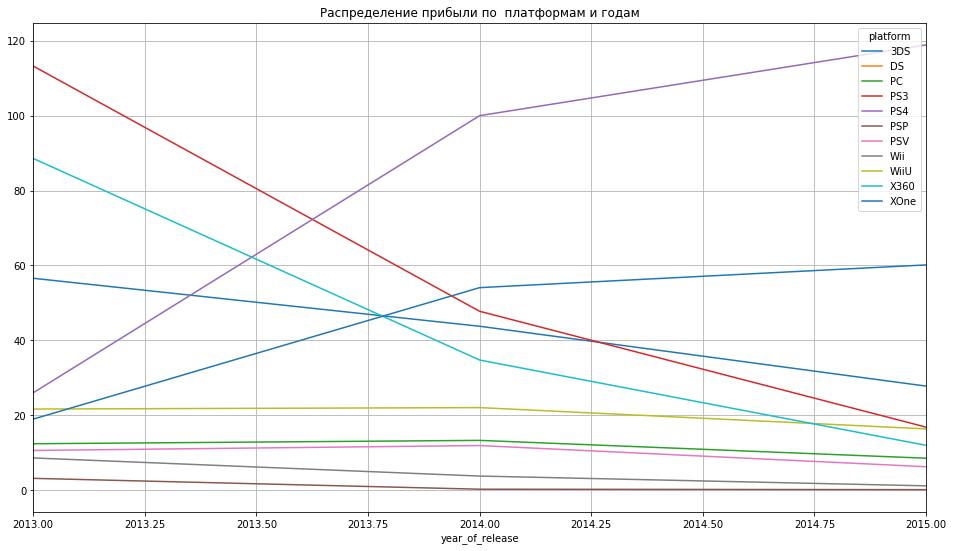

In [23]:
pd.pivot_table(data_games.query('2013 <= year_of_release < 2016'),
              index = 'year_of_release',
              columns = 'platform',
              values = 'sum_sales',
              aggfunc = 'sum').plot(grid = True, figsize = (16,9), title = 'Распределение прибыли по  платформам и годам')

plt.show()

In [24]:
#создадим таблицу по срезу
pd.pivot_table(data_games.query('2013 <= year_of_release < 2016'),
              index = 'year_of_release',
              columns = 'platform',
              values = 'sum_sales',
              aggfunc = 'sum')


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


Как видно из графика и таблицы растет только PS4 и XOne

**Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.  
Рассмотрим разницу в продажах, в средних продажах на разных платформах.**

In [25]:
#Сперва выберем самые дорогие игры
data_games.query('2013 <= year_of_release < 2016').sum_sales.describe()

count    1731.000000
mean        0.555026
std         1.344502
min         0.010000
25%         0.040000
50%         0.140000
75%         0.480000
max        21.050000
Name: sum_sales, dtype: float64

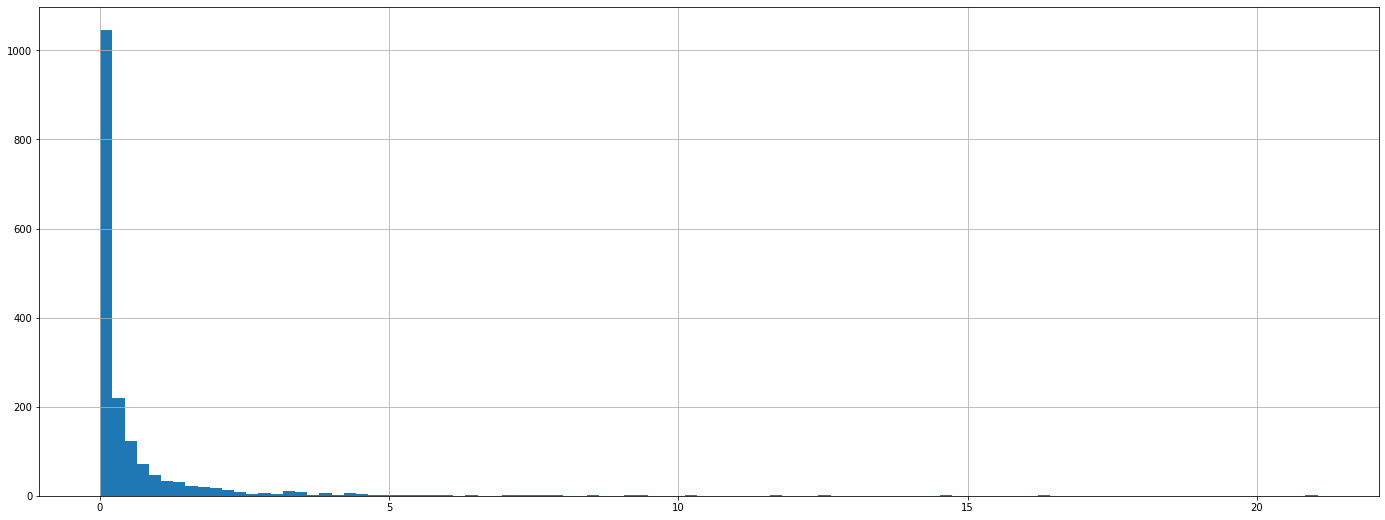

In [26]:
data_games.query('2013 <= year_of_release < 2016').sum_sales.hist(bins = 100, figsize = (24,9))
plt.show()

Расммотрим игры с суммарных доходом более 4 млн

In [27]:
games_actual = data_games.query('2013 <= year_of_release < 2016 & sum_sales >= 4' )
pd.pivot_table(games_actual,
               index = 'platform',
               values = 'sum_sales',
               aggfunc = ['mean', 'median','sum'])     


,mean,median,sum
,sum_sales,sum_sales,sum_sales
platform,,,
3DS,8.728000,7.550,43.64
PS3,8.091429,5.860,56.64
PS4,7.085385,6.080,92.11
WiiU,5.180000,4.655,20.72
X360,8.838000,9.180,44.19
XOne,5.366000,5.260,26.83


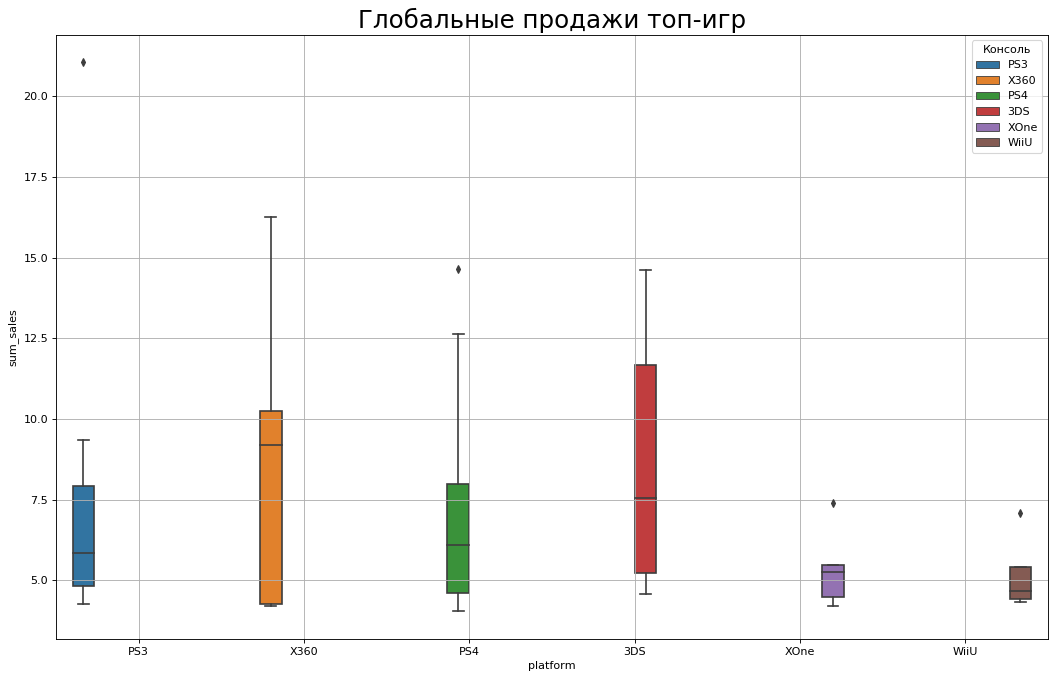

In [28]:
plt.figure(figsize=(16,10), dpi= 80)
sns.boxplot(x='platform', y='sum_sales', data=games_actual, hue='platform', )

plt.grid()
plt.title('Глобальные продажи топ-игр', fontsize=22)
plt.legend(title='Консоль')
plt.show()

**Вывод  
Итак, можем сказать, что средние продажи за актуальный период у 4 платформ (PS3, X360, PS4,3DS) находятся рядом в районе 8 млн.
у Xone и WiiU около 5.  
В тоже время максимальный продажи довольно сильно разнятся. Лидер - PS4 с показателем 92 млн.  
Если сравнить растущие платформы PS4 и XOne, видим отставание вторых и по средним показателям и по максимальным.**


   **Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.  
   За популярную платформу примем PS2.**

In [29]:
data_ps2 = data_games.query('platform == "PS2"')
data_ps2 = data_ps2.dropna()
#data_ps2.user_score = data_ps2.user_score.astype(float)
#data_ps2

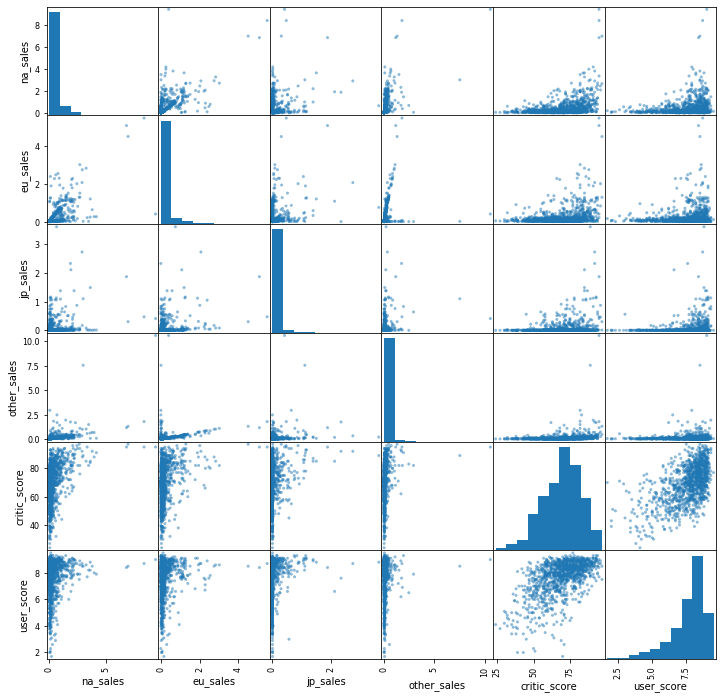

In [30]:
data_ps2_corr = data_ps2[['na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score']]
pd.plotting.scatter_matrix(data_ps2_corr, figsize=(12, 12))
plt.show()

In [31]:
data_ps2_corr.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.655312,0.261896,0.575840,0.390233,0.169334
eu_sales,0.655312,1.000000,0.283266,0.265005,0.291779,0.124795
jp_sales,0.261896,0.283266,1.000000,0.213619,0.214256,0.147916
other_sales,0.575840,0.265005,0.213619,1.000000,0.207457,0.074942
critic_score,0.390233,0.291779,0.214256,0.207457,1.000000,0.565841
user_score,0.169334,0.124795,0.147916,0.074942,0.565841,1.000000


**Итак по итогам диаграммы рассеяния и обзора результатов работы корреляции можем сделать следующие выводы:**  
 - наиболее выраженная зависимость от критиков в Северной Америке - 0.39, чуть меньше в Европе - 0.29, и по 0,2 в Японии и других странах  
 - зависимость отзывов игроков от продаж в США ЕС и Японии примерно одинаковая ~ 0.14
 - игры с наиболее высокими рейтингами могут быть прибыльными, или  игры с высокими продажами могут иметь высокие рейтинги
 
 
 Подобный результат может быть вызван особенностями рынка Японии и других стран, маркетинговых компаний внутри регионов, а также  предпочтениямипо жанрам. Покемон го не так активно обсуждается, как Call of Duty, например

### <font color='black'> Проверим вышеописанные выводы на еще двух платформах Wii и PS3 </red>

In [32]:
# подготовим соответствующие данные
data_ps3 = data_games.query('platform == "PS3"').dropna()
data_ps3corr = data_ps3[['na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score']]
data_Wii = data_games.query('platform == "Wii"').dropna()
data_Wiicorr = data_Wii[['na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score']]

In [33]:
data_Wiicorr.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.979392,0.792470,0.991366,0.171049,0.110175
eu_sales,0.979392,1.000000,0.795528,0.993853,0.156685,0.102825
jp_sales,0.792470,0.795528,1.000000,0.787203,0.196323,0.128662
other_sales,0.991366,0.993853,0.787203,1.000000,0.154734,0.101233
critic_score,0.171049,0.156685,0.196323,0.154734,1.000000,0.689119
user_score,0.110175,0.102825,0.128662,0.101233,0.689119,1.000000


In [34]:
data_ps3corr.corr()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
na_sales,1.000000,0.825162,0.375305,0.871258,0.449940,0.153161
eu_sales,0.825162,1.000000,0.417033,0.977975,0.377544,0.108795
jp_sales,0.375305,0.417033,1.000000,0.415763,0.194423,0.168092
other_sales,0.871258,0.977975,0.415763,1.000000,0.389895,0.129918
critic_score,0.449940,0.377544,0.194423,0.389895,1.000000,0.634133
user_score,0.153161,0.108795,0.168092,0.129918,0.634133,1.000000


In [35]:
# сделаем функцию построения диаграмм
def depending(console):
    df1 = data_games.query('platform == @console')
    df1 = df1.dropna()
    df2 = df1[['na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score']]
    pd.plotting.scatter_matrix(df2, figsize=(12, 12))
    plt.show()


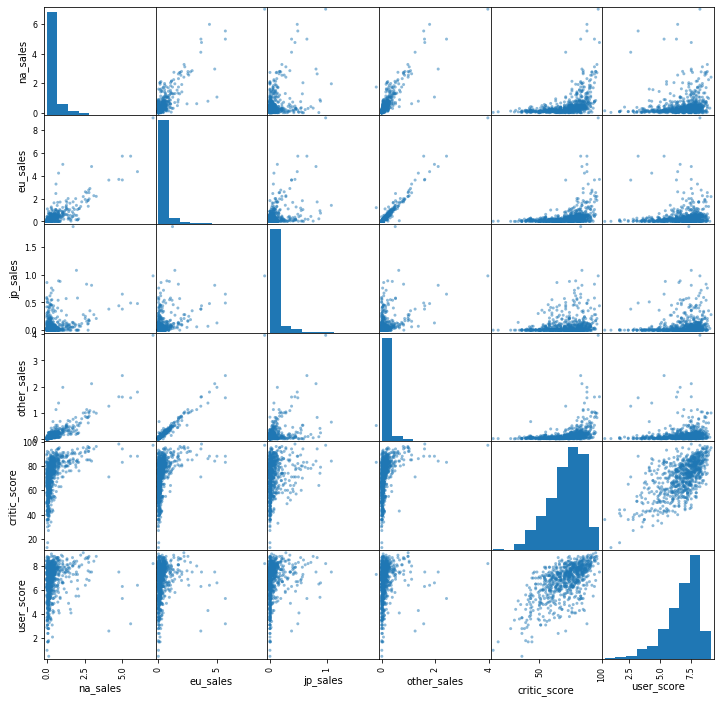

In [36]:
#Расммотрим диаграмму по платформе PS3
depending('PS3')

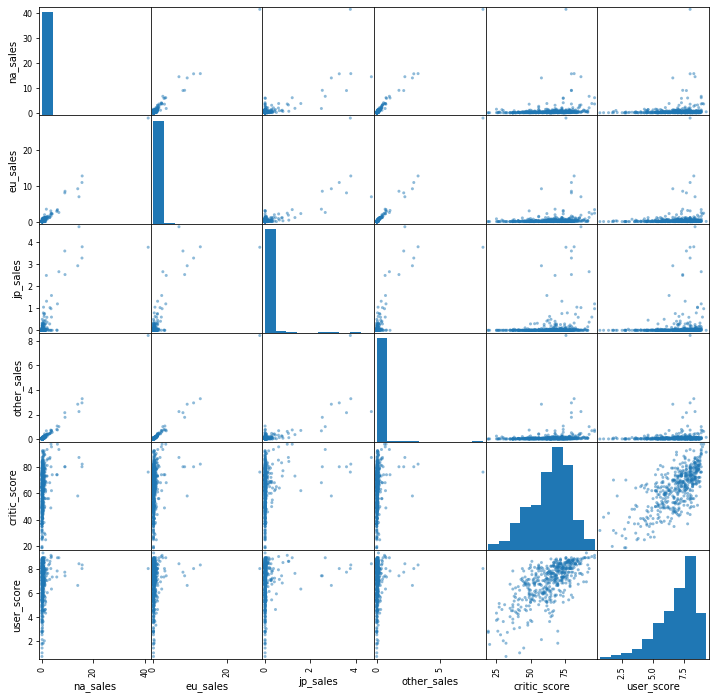

In [37]:
# и по Wii
depending('Wii')

**По друггим платформам мы имеем схожую ситуацию по корреляции, за исключением что на платформе Wii, впринципе боле популярной в Японии меньше зависмость от отзывов в ЕС и СА.**

**Посмотрим на общее распределение игр по жанрам.**

In [38]:
(
data_games
          .pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum')
          .sort_values(by ='sum_sales', ascending = False)
)

,sum_sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


In [39]:
(
games_actual
          .pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum')
          .sort_values(by ='sum_sales', ascending = False)
)

,sum_sales
genre,
Shooter,89.77
Action,79.25
Role-Playing,37.67
Sports,29.62
Misc,18.77
Fighting,12.42
Racing,7.09
Simulation,5.22
Platform,4.32


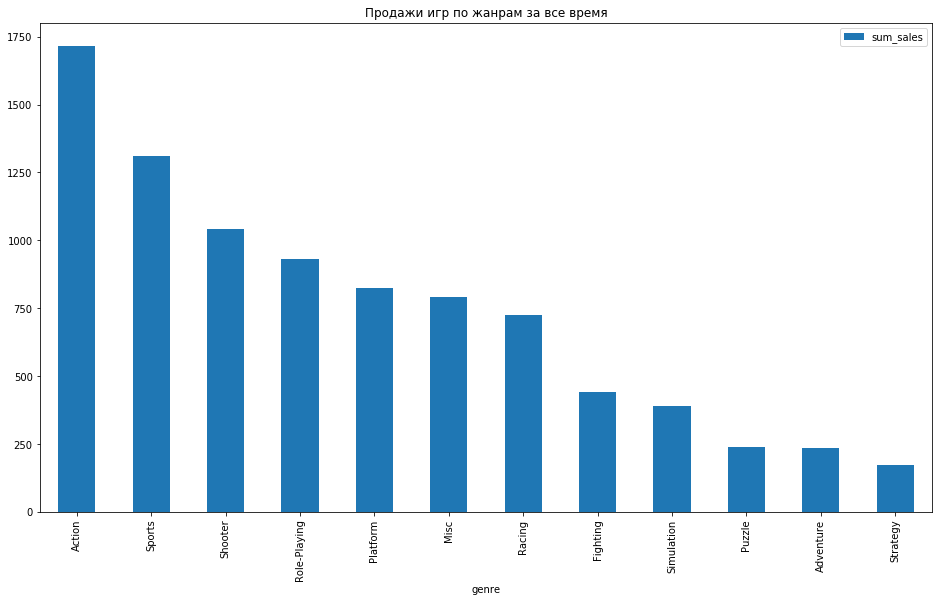

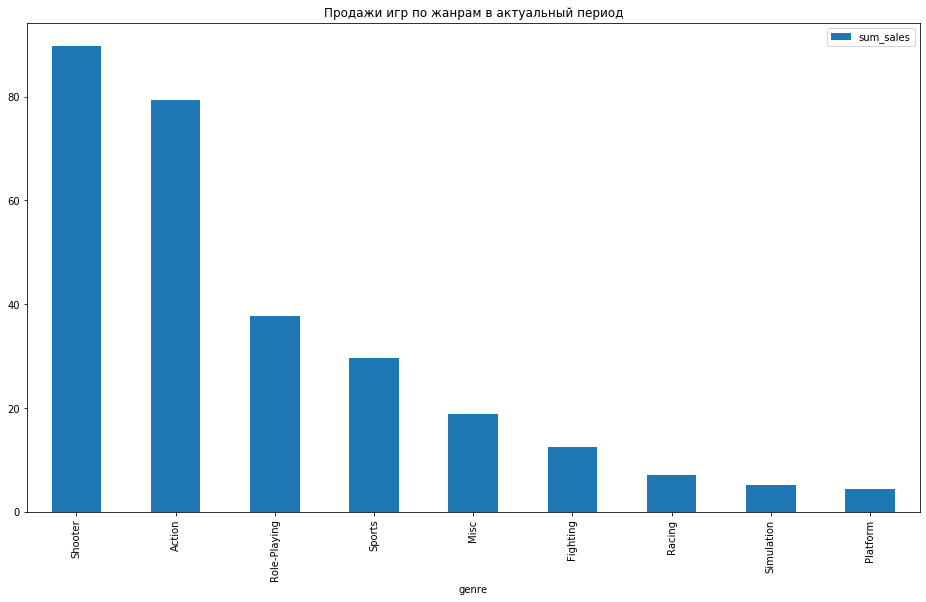

In [40]:
(
data_games.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum')
                                        .sort_values(by ='sum_sales', ascending = False)
                                        .plot(figsize = (16,9), kind = 'bar')
                       )
plt.title('Продажи игр по жанрам за все время')
(
games_actual
          .pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum')
          .sort_values(by ='sum_sales', ascending = False)
          .plot(figsize = (16,9), kind = 'bar')
)

plt.title('Продажи игр по жанрам в актуальный период')
plt.show()


**В тройке лидеров  за все время по продажам игр Action, Sports, Shooter  
  Среди аутсайдеров Puzzle, Adventure, Strategy**   
 В актуальном периоде Role-Playing сместил Sports

In [41]:
# посмотрим по играм
games_actual.query('genre == "Action"').sort_values(by ='sum_sales', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,NaN,4.72
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
235,Luigi's Mansion: Dark Moon,3DS,2013,Action,1.80,1.39,1.11,0.29,86.0,8.4,E,4.59
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05


In [42]:
games_actual.query('genre == "Shooter"').sort_values(by ='sum_sales', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44


In [43]:
games_actual.query('genre == "Platform"').sort_values(by ='sum_sales', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
260,Super Mario 3D World,WiiU,2013,Platform,2.11,1.16,0.73,0.32,93.0,9.0,E,4.32


In [44]:
games_actual.query('genre == "Simulation"').sort_values(by ='sum_sales', ascending = False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.9,0.24,NaN,NaN,NaN,5.22


**Выше предоставлена подборка самых дорогих игр по двум самым дорогим и самым дешевым жанрам в актуальном периоде.**

# Шаг 4. Составьте портрет пользователя каждого региона  
 Определите для пользователя каждого региона (NA, EU, JP):  
 - Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
 - Самые популярные жанры (топ-5). Поясните разницу.  
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?  

In [45]:
# Рассмотрим самые популярные платформы
(
    games_actual
    .pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales','sum_sales'], aggfunc = 'sum')
    .sort_values(by = ['jp_sales'], ascending = False)
    
)

,eu_sales,jp_sales,na_sales,sum_sales
platform,,,,
3DS,12.55,12.89,15.67,43.64
WiiU,5.57,4.28,9.40,20.72
PS4,44.74,2.11,30.69,92.11
PS3,26.46,1.94,18.48,56.64
X360,14.35,0.13,25.78,44.19
XOne,8.44,0.06,15.91,26.83


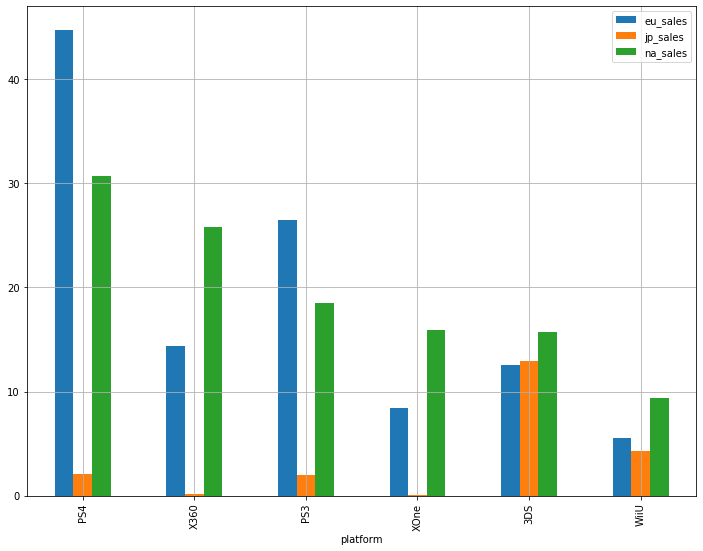

In [46]:
(
    games_actual
    .pivot_table(index = 'platform', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
    .sort_values(by = ['na_sales'], ascending = False)
    .plot(kind = 'bar', figsize = (12,9), grid = True)
    
)

plt.show()

**Рассмотрим сводную  таблицу по предпочтениям по платформам в разных регионах**


|Region|----|1st|2nd|3nd|4th|5th|  
|------|----|---|---|---|--|---|  
|NA    |----|PS4|X360|PS3|XOne|3DS|  
|EU    |----|PS4|PS3|X360|3DS|XOne|  
|JP    |----|3DS|WiiU|PS4|PS3|X360|  

Европаи Северная Америка в целом похожи набором популярных платформ и их расположением.  
Япония заметно отличается: в лидерах 3DS и WiiU

In [47]:
# Взглянем на различия по жанрам

(
    games_actual
    .pivot_table(index = 'genre', values = ['na_sales','eu_sales','jp_sales','sum_sales'], aggfunc = 'sum')
    .sort_values(by = ['jp_sales'], ascending = False)
    
)

,eu_sales,jp_sales,na_sales,sum_sales
genre,,,,
Role-Playing,12.27,7.70,14.67,37.67
Fighting,2.45,3.24,5.87,12.42
Shooter,32.42,3.10,42.74,89.77
Action,31.91,3.07,33.01,79.25
Simulation,2.11,1.90,0.97,5.22
Racing,2.15,1.28,3.15,7.09
Platform,1.16,0.73,2.11,4.32
Sports,20.60,0.23,4.20,29.62
Misc,7.04,0.16,9.21,18.77


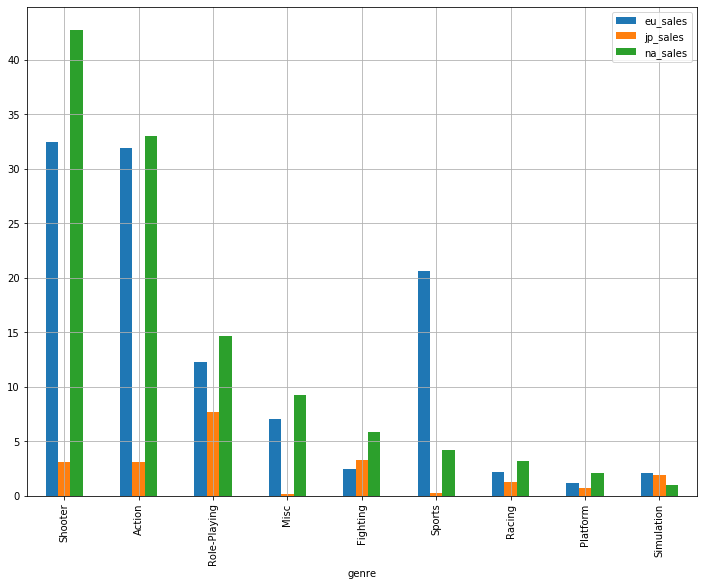

In [48]:
(
    games_actual
    .pivot_table(index = 'genre', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
    .sort_values(by = ['na_sales'], ascending = False)
    .plot(kind = 'bar', figsize = (12,9), grid = True)
    
)
plt.show()

Результаты по жанрам:  
 
 |Region|----|1st|2nd|3nd|4th|5th|  
|------|----|---|---|---|--|---|  
|NA    |----|Shooter|Action|Role-Playing|Misc|Fighting|  
|EU    |----|Shooter|Action|Sports|Role-Playing|Misc|  
|JP    |----|Role-Playing|Fighting|Shooter|Action|Simulation0|  



Видно что, Европа и Сев Америка очень схожи, у Европы в топ-5 есть Спорт, в США есть Разные (Minecraft).

In [49]:
# miscellaneous - жанр игпы Minecraft
games_actual.query('genre == "Misc"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27
261,Minecraft,PS4,2014,Misc,1.48,2.02,0.14,0.68,NaN,NaN,NaN,4.32


In [50]:
# любопытно было узанть какие игры на перволм месте в Японии
games_actual.query('genre == "Role-Playing" & platform == "3DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68


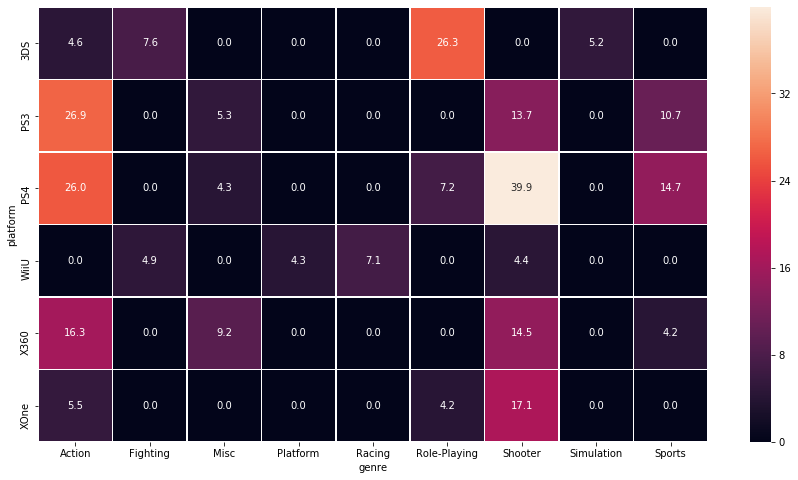

In [51]:
platform_genre_sales = games_actual.pivot_table(
                        index='platform', 
                        columns='genre', 
                        values='sum_sales', 
                        aggfunc=sum).fillna(0).applymap(float)
plt.figure(figsize=(15,8))
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5,)
plt.show()

На графике выше предоставлены распределения продаж по жанрам и платформам одновременно.
Как видим успешнее всего Action на PS3 и PS4, RPG - 3DS, Shooter - PS4,XOne,X360,PS3.

In [52]:
data_games.query('platform == "PS4" & genre == "Shooter"').sort_values(by = 'sum_sales', ascending = False).head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


Можно увидеть какие много продаютсяи  популярны на PS4

**Рассмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе**

In [53]:
# Рассмотрим какие рейтинги присутствуют
games_actual.rating.unique()
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 16 to 298
Data columns (total 12 columns):
name               39 non-null object
platform           39 non-null object
year_of_release    39 non-null int64
genre              39 non-null object
na_sales           39 non-null float64
eu_sales           39 non-null float64
jp_sales           39 non-null float64
other_sales        39 non-null float64
critic_score       24 non-null float64
user_score         27 non-null float64
rating             27 non-null object
sum_sales          39 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 5.2+ KB


In [54]:
games_actual.query(' rating != rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN,5.22
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,NaN,4.87


Нужно обратить внимание на данные, тк много пропусков значений в достаточно популярных играх

In [55]:
games_actual.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum' )

,eu_sales,jp_sales,na_sales
rating,,,
E,25.30,3.35,11.26
E10+,1.18,1.46,1.54
M,47.84,2.92,54.62
T,5.05,0.27,7.34


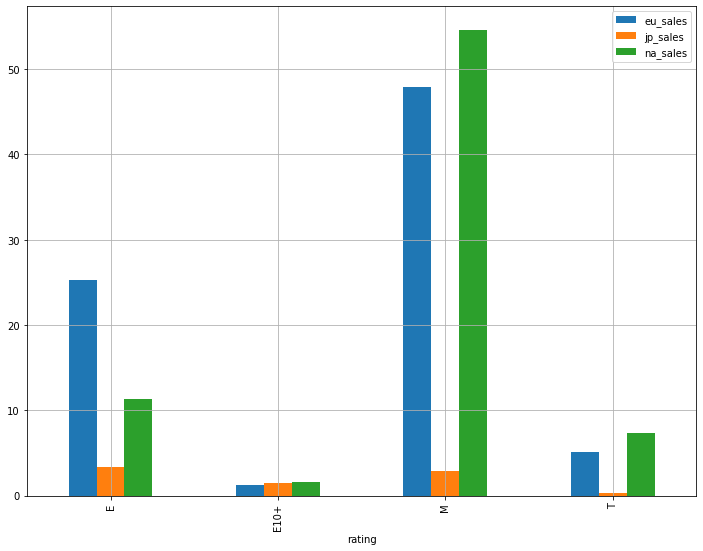

In [56]:
(
games_actual.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum' )
    .plot(kind = 'bar', figsize = (12,9), grid = True)
    
)
plt.show()

Результаты по рейтингу ESRB:  
 
 |Region|----|1st|2nd|3nd|4th|
|------|----|---|---|---|--| 
|NA    |----|M|E|T|E10+|  
|EU    |----|M|E|T|E10+| 
|JP    |----|E|M|E10+|T| 


Выводы  
В целом видно, что состав по всем регионам первых двух мест одинаков.  
Продажи игр категрии E в Европе больше, чем в СА, хотя тоже следуют вторыми как и в СА.  
Продажи игр e10+ близки во всех рассматриваемых регионах.
Япония довольно сильно отличается по жанровым предпочтениям, тогда как ЕС и СА довольно близки

### Итак портрет геймера каждого региона:
##### СА - Играет на PS4 в Shooter, с рейтингом M  
##### ЕС - Играет на PS4 в Shooter, с рейтингом M  
##### ЯП - Играет на 3DS в RPG, с рейтингом E  

#  Шаг 5. Проверка гипотез  
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные  

### Проверим гипотезу :  
 **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и примем ее за нулевую**  
 **Альтернативная - Средние пользовательские рейтинги платформ Xbox One и PC различаются**  
 
Сделаем это потому, что нулевая гипотеза принимается, как правило об возможности равенства средних двух генеральных совокупностей.
Уровень критической значимости примем за 0,05


In [57]:
#установим удобный формат вывода чисел
pd.options.display.float_format = '{: .2f}'.format

In [58]:
# сформируем необходимые данные, расчитаем среднее по платформам

mean_xone = data_games.query('platform =="XOne"')[['user_score']].dropna() 
mean_pc = data_games.query('platform =="PC"')[['user_score']].dropna()


print('средние отзывы XOne',mean_xone.mean() )
print()
print('средние отзывы PC',mean_pc.mean() )

средние отзывы XOne user_score    6.52
dtype: float64

средние отзывы PC user_score    7.07
dtype: float64


In [59]:
# Зададим критический уровень статистической значимости, прмем его за распространенный 0,05
alpha = 0.05    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_xone, 
    mean_pc, equal_var = False)

# выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [4.5385803e-06]
Отвергаем нулевую гипотезу


**Полученное значение p-value говорит о том, что средние отзывы пользователей по платформам неодинаковы. С вероятностью в 0% такое различие можно получить случайно. Это явно достаточная вероятность, и мы можем сделать вывод о значимом различии между средними рейтингами пользователей по выбранным платформам.**

### Проверим следующую гипотезу :  
 **Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные - и примем ее за альтернативную**  
 **Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые - нулевая гипотеза**  
 
Сделаем это потому, что нулевая гипотеза принимается, как правило об возможности равенства средних двух генеральных совокупностей.
Уровень критической значимости примем за 0,05

In [60]:
# сформируем необходимые данные, расчитаем среднее по жанрам

mean_action = data_games.query('genre =="Action"')[['user_score']].dropna() 
mean_sports = data_games.query('genre =="Sports"')[['user_score']].dropna()


print('средние отзывы Action',mean_action.mean() )
print()
print('средние отзывы Sports',mean_sports.mean() )

средние отзывы Action user_score    7.06
dtype: float64

средние отзывы Sports user_score    6.95
dtype: float64


In [61]:
# Зададим критический уровень статистической значимости, прмем его за распространенный 0,05
alpha = 0.05    
# проверим гипотезу о равенстве средних двух независимых совокупностей, дисперсии выборок считаем не равными
results =  st.ttest_ind(
    mean_action, 
    mean_sports, equal_var = False)

# выведем на экран получившееся p-значение)
print('p-значение:', results.pvalue) 
# всравним получившееся p-значение с заданным уровнем статистической значимости
if (results.pvalue < alpha):  
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: [0.07370217]
Не получилось отвергнуть нулевую гипотезу


***Полученное значение p-value говорит о том, что   средний рейтинг пользователей по жанрам с вероятностью в почти 7% может быть получен различным случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами пользователей по жанрам  Экшн и Спортс.***

# Выводы

   Мы открыли, провели обзор данных. Увидели много пропусков значений в пользовательских рейтингах и оценках критиков. Возможно это связано с тем, что рейтинги по более новым играм не сформированы, это характерно для популярных игр, есть часть игр малоизвестных, котрые никто не оценивал.  
   В оценках пользователей присутствовал термин tbd - to be determined, статус - в процессе определения, значения с такими данными было необходимо заменить на null. Также мы обработали другие пропуски, котрых было небольшое количество и целесообразнее было просто отсечь строки  с ними.
   
   **1. Исследовательский анализ данных**  
 -  ТОП-5 лет по количеству игр:
 
 
 |год |----|кол-во игр|
 |----|----|----|
 |2008|----|1427|
 |2009|----|1426|
 |2010|----|1255|
 |2007|----|1197|
 |2011|----|1136|
 
 - ТОП-5 платформ по продажам
	     
          
|platform|----|	 sum_sales|
|----|----|----|
|PS2|----| 1233.56|
|360|----|	961.24|
|PS3|----|	931.34|
|Wii|----|	891.18|
|DS|----|	802.78 |

- средний срок "жизненного цикла продаж игр на платформе" - 10 лет. пик наступает через 5 идалее идет угасание. Пик одной платформы может совпадать с полным угасаниме какой-либо другой.  

- В актуальный период перспективными платформами можно считать Xone и PS4

- Сильно падают PS3, X360, что логично, тк растут след поколения этих платформ , чуть плавнее  WiiU 3DS

- Средние продажи за актуальный период у 4 платформ (PS3, X360, PS4,3DS) находятся рядом в районе 8 млн. у Xone и WiiU около 5.
В тоже время максимальный продажи довольно сильно разнятся. Лидер - PS4 с показателем 92 млн.
Если сравнить растущие платформы PS4 и XOne, видим отставание вторых и по средним показателям и по максимальным.  

- Наиболее выраженная зависимость от критиков в Северной Америке, чуть меньше в Европе , гораздо ниже в Японии и других странах. Зависимость отзывов игроков от продаж в США ЕС и Японии примерно одинаковая ~ 0.14. Игры с наиболее высокими рейтингами могут быть прибыльными, или игры с высокими продажами могут иметь высокие рейтинги

**2. Портрет пользователя каждого региона** 

**Рассмотрим сводную  таблицу по предпочтениям по платформам в разных регионах**


|Region|----|1st|2nd|3nd|4th|5th|  
|------|----|---|---|---|--|---|  
|NA    |----|PS4|X360|PS3|XOne|3DS|  
|EU    |----|PS4|PS3|X360|3DS|XOne|  
|JP    |----|3DS|WiiU|PS4|PS3|X360|  

Европаи Северная Америка в целом похожи набором популярных платформ и их расположением.  
Япония заметно отличается: в лидерах 3DS и WiiU


**Результаты по жанрам:**
  
 
 |Region|----|1st|2nd|3nd|4th|5th|  
|------|----|---|---|---|--|---|  
|NA    |----|Shooter|Action|Role-Playing|Misc|Fighting|  
|EU    |----|Shooter|Action|Sports|Role-Playing|Misc|  
|JP    |----|Role-Playing|Fighting|Shooter|Action|Simulation|  


Видно что, Европа и Сев Америка очень схожи, у Европы в топ-5 есть Спорт, в США есть Разные (Minecraft).


**Результаты по рейтингу ESRB:  **
 
 |Region|----|1st|2nd|3nd|4th|
|------|----|---|---|---|--| 
|NA    |----|M|E|T|E10+|  
|EU    |----|M|E|T|E10+| 
|JP    |----|E|M|E10+|T| 


В целом видно, что состав по всем регионам первых двух мест одинаков.  
Продажи игр категрии E в Европе больше, чем в СА, хотя тоже следуют вторыми как и в СА.  
Продажи игр e10+ близки во всех рассматриваемых регионах.
Япония довольно сильно отличается по жанровым предпочтениям, тогда как ЕС и СА довольно близки

**Итак портрет геймера каждого региона:**  

 NA - Играет на PS4 в Shooter, с рейтингом M  
 EU - Играет на PS4 в Shooter, с рейтингом M  
 JP - Играет на 3DS в RPG, с рейтингом E**  
 
 Но это не значит, что все шутеры на пс4 будут успешны в Европе и США, или РПГ в японии. Это говорит  об успехе таких игр как  
 Покемон в Японии, или Call of Duty: Advanced Warfare В СА и ЕС.
 
 

**3. Проверка гипотез** 

 - средние рейтинги пользователей по платформам различны. 
 
 - средние рейтинги пользователей по жанрам Экшн и Спортс очень схожи.




   
   